## Transfer Learning VGG 16 and VGG 19 using Keras

In [17]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/client/session.py:1769: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [18]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [19]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train'
valid_path = '/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/valid'


In [20]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [21]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [22]:
  # useful for getting number of output classes
folders = glob('/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train/*')

In [23]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [24]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [25]:

# view the structure of the model
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [26]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [27]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [28]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train',
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [29]:
test_set = test_datagen.flow_from_directory('/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/valid',
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [30]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/100
287/287 [==============================] - 453s 2s/step - loss: 2.8098 - accuracy: 0.2908 - val_loss: 1.6272 - val_accuracy: 0.4205
Epoch 2/100
287/287 [==============================] - 282s 981ms/step - loss: 1.6254 - accuracy: 0.4537 - val_loss: 1.5359 - val_accuracy: 0.5082
Epoch 3/100
287/287 [==============================] - 283s 986ms/step - loss: 1.5517 - accuracy: 0.4879 - val_loss: 2.0262 - val_accuracy: 0.3921
Epoch 4/100
287/287 [==============================] - 280s 977ms/step - loss: 1.4725 - accuracy: 0.5207 - val_loss: 1.4494 - val_accuracy: 0.5245
Epoch 5/100
287/287 [==============================] - 279s 973ms/step - loss: 1.3211 - accuracy: 0.5605 - val_loss: 1.4162 - val_accuracy: 0.5562
Epoch 6/100
287/287 [==============================] - 280s 975ms/step - loss: 1.3196 - accuracy: 0.5623 - val_loss: 1.3012 - val_accuracy: 0.5952
Epoch 7/100
287/287 [==============================] - 278s 970ms/step - loss: 1.2995 - accuracy: 0.5766 - val_loss: 2.02

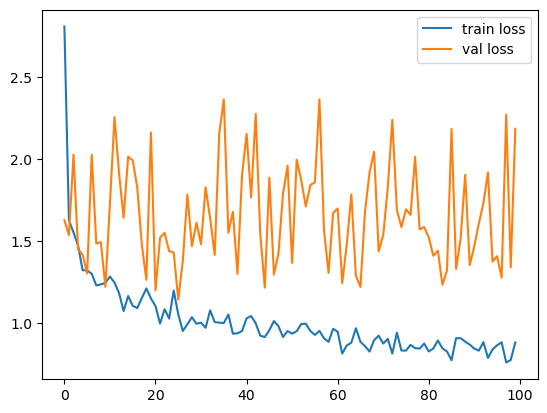

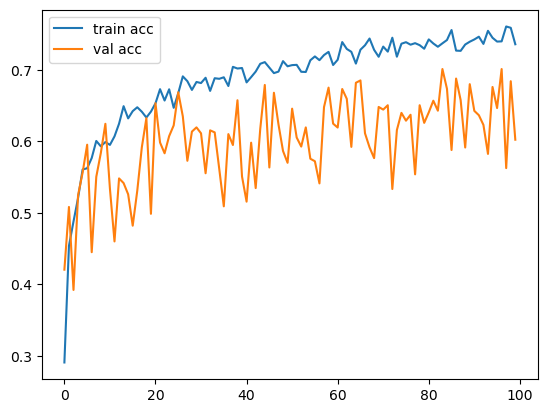

<Figure size 640x480 with 0 Axes>

In [31]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [32]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [33]:

y_pred = model.predict(test_set)


72/72 [==============================] - 22s 296ms/step


In [34]:
y_pred

array([[3.7897041e-07, 3.2267671e-08, 1.6525956e-07, ..., 7.6444134e-10,
        3.9345306e-08, 9.9999702e-01],
       [4.9952459e-24, 9.1558022e-10, 4.1550734e-13, ..., 3.0351837e-24,
        3.1815949e-03, 2.2769267e-02],
       [4.1128920e-11, 1.5884789e-04, 9.9966145e-01, ..., 4.3195406e-11,
        8.0687421e-09, 1.5944192e-08],
       ...,
       [1.1880995e-19, 1.4463279e-07, 1.0240025e-08, ..., 3.6866007e-10,
        1.2121705e-08, 9.8881489e-01],
       [5.5447083e-07, 1.2372320e-03, 5.1334318e-02, ..., 2.5966245e-09,
        1.7831064e-03, 4.2316780e-05],
       [1.1625991e-03, 8.4130852e-06, 8.4815169e-05, ..., 4.9956645e-07,
        6.3535161e-08, 9.9760735e-01]], dtype=float32)

In [35]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [36]:
y_pred

array([9, 6, 2, ..., 9, 4, 9])